In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")



In [3]:
# Merge datasets: Merge transactions with customer data
merged_data = transactions.merge(customers, on='CustomerID')



In [4]:
# Feature engineering: Aggregate customer transaction data
customer_profile = (
    merged_data.groupby('CustomerID')
    .agg({
        'TotalValue': 'sum',  # Total revenue generated by the customer
        'Quantity': 'sum',  # Total quantity purchased
        'ProductID': 'nunique'  # Number of unique products purchased
    })
    .reset_index()
)



In [5]:
# Scale the features for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_profile[['TotalValue', 'Quantity', 'ProductID']])



In [6]:
# Perform KMeans clustering with a range of clusters (2 to 10)
db_scores = []  # To store DB Index scores for each cluster count
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    db_score = davies_bouldin_score(scaled_data, labels)
    db_scores.append(db_score)



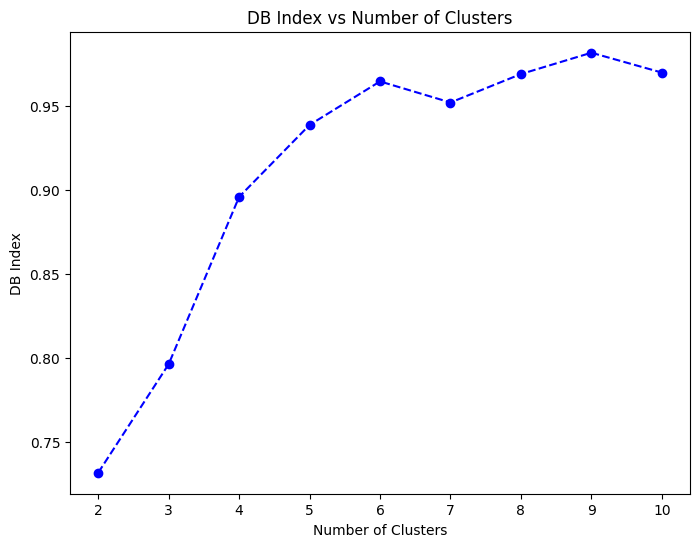

In [7]:
# Plot DB Index vs number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), db_scores, marker='o', linestyle='--', color='b')
plt.title('DB Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.show()



In [8]:
# Choose the optimal number of clusters based on DB Index (lower is better)
optimal_clusters = db_scores.index(min(db_scores)) + 2
print(f"Optimal number of clusters: {optimal_clusters}")



Optimal number of clusters: 2


In [9]:
# Final KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_data)



KMeans(n_clusters=2, random_state=42)

In [10]:
# Assign the cluster labels back to the customer profile
customer_profile['Cluster'] = kmeans.labels_



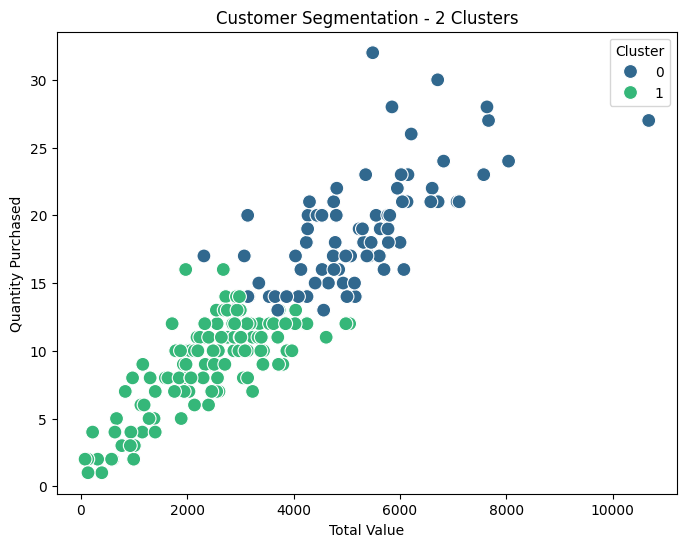

In [11]:
# Visualize the clusters using a scatter plot (2D projection)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_profile['TotalValue'], y=customer_profile['Quantity'], hue=customer_profile['Cluster'], palette='viridis', s=100)
plt.title(f'Customer Segmentation - {optimal_clusters} Clusters')
plt.xlabel('Total Value')
plt.ylabel('Quantity Purchased')
plt.show()

